In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad

In [2]:
sc._settings.ScanpyConfig.n_jobs = -1

In [2]:
def z_score_normalization(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

def reorder_columns(df, col_changed, col_position) -> pd.DataFrame:
    """
    Reordering colums. The second input can either be an integer for index or it can be a reference column name. If reference column name is chosen, the column will be placed after the reference column.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The first argument must be a pandas DataFrame")
    if not isinstance(col_changed, str):
        raise ValueError("The second argument must be a string representing a column name")
    if not isinstance(col_position, (str, int)):
        raise ValueError("The third argument must be either a string representing a column name or an integer representing a column index")
    if isinstance(col_position, int):
        cols = df.columns.tolist()
        if col_changed in cols and col_position <= len(cols) + 1:
            cols.remove(col_changed)
        
            index = col_position
            cols.insert(index, col_changed)
            
            df = df[cols]
    else:
        cols = df.columns.tolist()
        if col_changed in cols and col_position in cols:
            cols.remove(col_changed)
            index = cols.index(col_position)
            cols.insert(index+1, col_changed)
            
            df = df[cols]
    return df

In [37]:
df = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/CRC_FFPE/quantification/CRC_clusters_neighborhoods_markers.csv')

In [7]:
df.columns

Index(['Unnamed: 0', 'CellID', 'ClusterID', 'EventID', 'File Name', 'Region',
       'TMA_AB', 'TMA_12', 'Index in File', 'groups', 'patients', 'spots',
       'CD44 - stroma:Cyc_2_ch_2', 'FOXP3 - regulatory T cells:Cyc_2_ch_3',
       'CD8 - cytotoxic T cells:Cyc_3_ch_2',
       'p53 - tumor suppressor:Cyc_3_ch_3',
       'GATA3 - Th2 helper T cells:Cyc_3_ch_4',
       'CD45 - hematopoietic cells:Cyc_4_ch_2', 'T-bet - Th1 cells:Cyc_4_ch_3',
       'beta-catenin - Wnt signaling:Cyc_4_ch_4', 'HLA-DR - MHC-II:Cyc_5_ch_2',
       'PD-L1 - checkpoint:Cyc_5_ch_3', 'Ki67 - proliferation:Cyc_5_ch_4',
       'CD45RA - naive T cells:Cyc_6_ch_2', 'CD4 - T helper cells:Cyc_6_ch_3',
       'CD21 - DCs:Cyc_6_ch_4', 'MUC-1 - epithelia:Cyc_7_ch_2',
       'CD30 - costimulator:Cyc_7_ch_3', 'CD2 - T cells:Cyc_7_ch_4',
       'Vimentin - cytoplasm:Cyc_8_ch_2', 'CD20 - B cells:Cyc_8_ch_3',
       'LAG-3 - checkpoint:Cyc_8_ch_4', 'Na-K-ATPase - membranes:Cyc_9_ch_2',
       'CD5 - T cells:Cyc_9_ch_3', 'ID

In [38]:
df.drop(columns=['Unnamed: 0', 'CellID', 'ClusterID', 'EventID', 'Region', 'TMA_AB', 'TMA_12', 'Index in File', 'groups', 'patients', 'spots', 
                 'cell_id:cell_id', 'tile_nr:tile_nr', 'X_withinTile:X_withinTile','Y_withinTile:Y_withinTile', 
                 'Z:Z','Profile_Homogeneity:Fiter1', 'ClusterSize', 'neighborhood10', 'CD4+ICOS+', 'CD4+Ki67+', 'CD4+PD-1+',
                 'CD68+CD163+ICOS+', 'CD68+CD163+Ki67+', 'CD68+CD163+PD-1+','CD68+ICOS+', 'CD68+Ki67+', 'CD68+PD-1+', 
                 'CD8+ICOS+', 'CD8+Ki67+','CD8+PD-1+', 'Treg-ICOS+', 'Treg-Ki67+', 'Treg-PD-1+','neighborhood number final', 'neighborhood name'], inplace=True)
df.rename(columns={'ClusterName': 'cell_type'}, inplace=True)
df = reorder_columns(df, 'File Name', 'DRAQ5:Cyc_23_ch_4')
df = reorder_columns(df, 'size:size', 'DRAQ5:Cyc_23_ch_4')

In [26]:
df.columns

Index(['CD44 - stroma:Cyc_2_ch_2', 'FOXP3 - regulatory T cells:Cyc_2_ch_3',
       'CD8 - cytotoxic T cells:Cyc_3_ch_2',
       'p53 - tumor suppressor:Cyc_3_ch_3',
       'GATA3 - Th2 helper T cells:Cyc_3_ch_4',
       'CD45 - hematopoietic cells:Cyc_4_ch_2', 'T-bet - Th1 cells:Cyc_4_ch_3',
       'beta-catenin - Wnt signaling:Cyc_4_ch_4', 'HLA-DR - MHC-II:Cyc_5_ch_2',
       'PD-L1 - checkpoint:Cyc_5_ch_3', 'Ki67 - proliferation:Cyc_5_ch_4',
       'CD45RA - naive T cells:Cyc_6_ch_2', 'CD4 - T helper cells:Cyc_6_ch_3',
       'CD21 - DCs:Cyc_6_ch_4', 'MUC-1 - epithelia:Cyc_7_ch_2',
       'CD30 - costimulator:Cyc_7_ch_3', 'CD2 - T cells:Cyc_7_ch_4',
       'Vimentin - cytoplasm:Cyc_8_ch_2', 'CD20 - B cells:Cyc_8_ch_3',
       'LAG-3 - checkpoint:Cyc_8_ch_4', 'Na-K-ATPase - membranes:Cyc_9_ch_2',
       'CD5 - T cells:Cyc_9_ch_3', 'IDO-1 - metabolism:Cyc_9_ch_4',
       'Cytokeratin - epithelia:Cyc_10_ch_2',
       'CD11b - macrophages:Cyc_10_ch_3', 'CD56 - NK cells:Cyc_10_ch_4',
    

In [39]:
df.columns = df.columns.str.split(' - ').str[0]
df.columns

Index(['CD44', 'FOXP3', 'CD8', 'p53', 'GATA3', 'CD45', 'T-bet', 'beta-catenin',
       'HLA-DR', 'PD-L1', 'Ki67', 'CD45RA', 'CD4', 'CD21', 'MUC-1', 'CD30',
       'CD2', 'Vimentin', 'CD20', 'LAG-3', 'Na-K-ATPase', 'CD5', 'IDO-1',
       'Cytokeratin', 'CD11b', 'CD56', 'aSMA', 'BCL-2', 'CD25', 'CD11c',
       'PD-1', 'Granzyme B', 'EGFR', 'VISTA', 'CD15', 'ICOS', 'Synaptophysin',
       'GFAP', 'CD7', 'CD3', 'Chromogranin A', 'CD163', 'CD45RO', 'CD68',
       'CD31', 'Podoplanin', 'CD34', 'CD38', 'CD138', 'X:X', 'Y:Y',
       'HOECHST1:Cyc_1_ch_1', 'CDX2', 'Collagen IV', 'CD194', 'MMP9', 'CD71',
       'CD57', 'MMP12', 'DRAQ5:Cyc_23_ch_4', 'size:size', 'File Name',
       'cell_type'],
      dtype='object')

In [40]:
df = reorder_columns(df, 'Y:Y', 'size:size')
df = reorder_columns(df, 'X:X', 'size:size')
df.rename(columns={'X:X': 'x', 'Y:Y': 'y', 'size:size': 'size', 'DRAQ5:Cyc_23_ch_4': 'DRAQ5'}, inplace=True)

In [41]:
df

CD44       FOXP3         CD8          p53       GATA3  \
0         1.843591   17.398706    0.000000    59.391884   35.244526   
1        30.284525   18.375738   74.695236   271.420136   30.313547   
2       139.488510  249.746979   85.556976   705.369324   49.865829   
3        20.596886   81.759758    0.000000     0.000000   34.731583   
4        67.328728  122.195473   11.028284   325.076691   93.776245   
...            ...         ...         ...          ...         ...   
258380   30.748373   44.689804    0.000000   164.633865   37.099144   
258381  613.206909  481.540497  239.230286   713.958069  246.010757   
258382  392.992676  359.488373  276.082519  1243.198608  400.688873   
258383  144.657471  198.371643    0.000000     0.000000  104.403664   
258384  259.350708    0.000000  511.703155    46.236359   39.979027   

               CD45        T-bet  beta-catenin    HLA-DR       PD-L1  ...  \
0          0.000000    45.537239    258.346375  0.000000    7.834526  ...   
1          0.000000     8.821254    668.978577  0.000000   80.639305  ...   
2          8.435891   179.875778    480.811737  3.066591  172.340301  ...   
3          0.000000   122.186234    145.830063  0.000000    5.521088  ...   
4          0.000000   323.319305    987.071655  0.000000   63.922062  ...   
...             ...          ...           ...       ...         ...  ...   
258380   770.756287     0.000000    620.035217  0.000000    0.000000  ...   
258381  2236.093018   549.120544    972.123901  2.378212  273.330841  ...   
258382  5450.664551  1104.000000   1674.244507  0.353912  288.512848  ...   
258383  3242.847900   518.949768   1027.370483  1.378499  120.991173  ...   
258384  1880.674072     0.000000    523.930664  0.000000    0.000000  ...   

             MMP9         CD71        CD57       MMP12        DRAQ5   size  \
0        0.000000   655.881592   27.169783   36.131023  2011.402222  10120   
1        0.000000   478.416260  160.619858   39.138241  3221.254883    861   
2       17.974144   387.765259   72.910377    2.523008  5228.323730   6206   
3        0.000000   612.506958   12.255139   30.254667  1259.016846   6320   
4        0.000000  2661.427979   84.200500  186.074799  8041.375000   1591   
...           ...          ...         ...         ...          ...    ...   
258380   0.000000   897.826416   13.697555    2.403872  2098.054688   6646   
258381   4.792668   338.211517   42.180298   13.714349  3702.538330   2770   
258382   0.235941  1480.583740   73.265282   40.589241  5737.778320   1636   
258383   0.920707  2417.131348   64.942406   29.051401  5763.093262   3435   
258384   0.000000  1318.838013   14.700948    8.482681  1156.453857   7048   

           x    y  File Name     cell_type  
0         77  589   reg001_A  granulocytes  
1        106  826   reg001_A  granulocytes  
2        107  545   reg001_A  granulocytes  
3         98  564   reg001_A  granulocytes  
4        217  329   reg001_A  granulocytes  
...      ...  ...        ...           ...  
258380  1629  717   reg057_B  CD3+ T cells  
258381   741  878   reg059_A  CD3+ T cells  
258382   668  551   reg062_A  CD3+ T cells  
258383   868  162   reg067_A  CD3+ T cells  
258384   382  450   reg069_B  CD3+ T cells  

[258385 rows x 63 columns]

In [42]:
df.to_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/CRC_FFPE/quantification/processed/CRC_FFPE_cleaned.csv', index=False)

In [48]:
X_columns = df.columns[:df.columns.get_loc('size:size')]
obs_columns = df.columns[df.columns.get_loc('size:size'):]
adata = ad.AnnData(
    X=df[X_columns],
    obs=df[obs_columns],
    var=pd.DataFrame(index=X_columns)
)

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [39]:
adata.X.max()

6.760848538533068

In [49]:
adata.raw = adata
adata.X = np.arcsinh(adata.X/150)
adata.layers['zscore'] = z_score_normalization(adata.X)

In [62]:
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


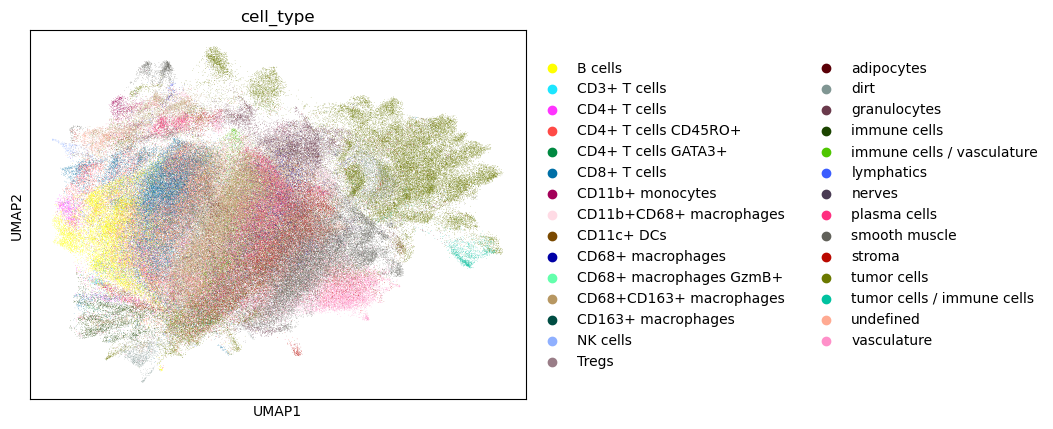

In [63]:
sc.pl.umap(adata, color='cell_type')

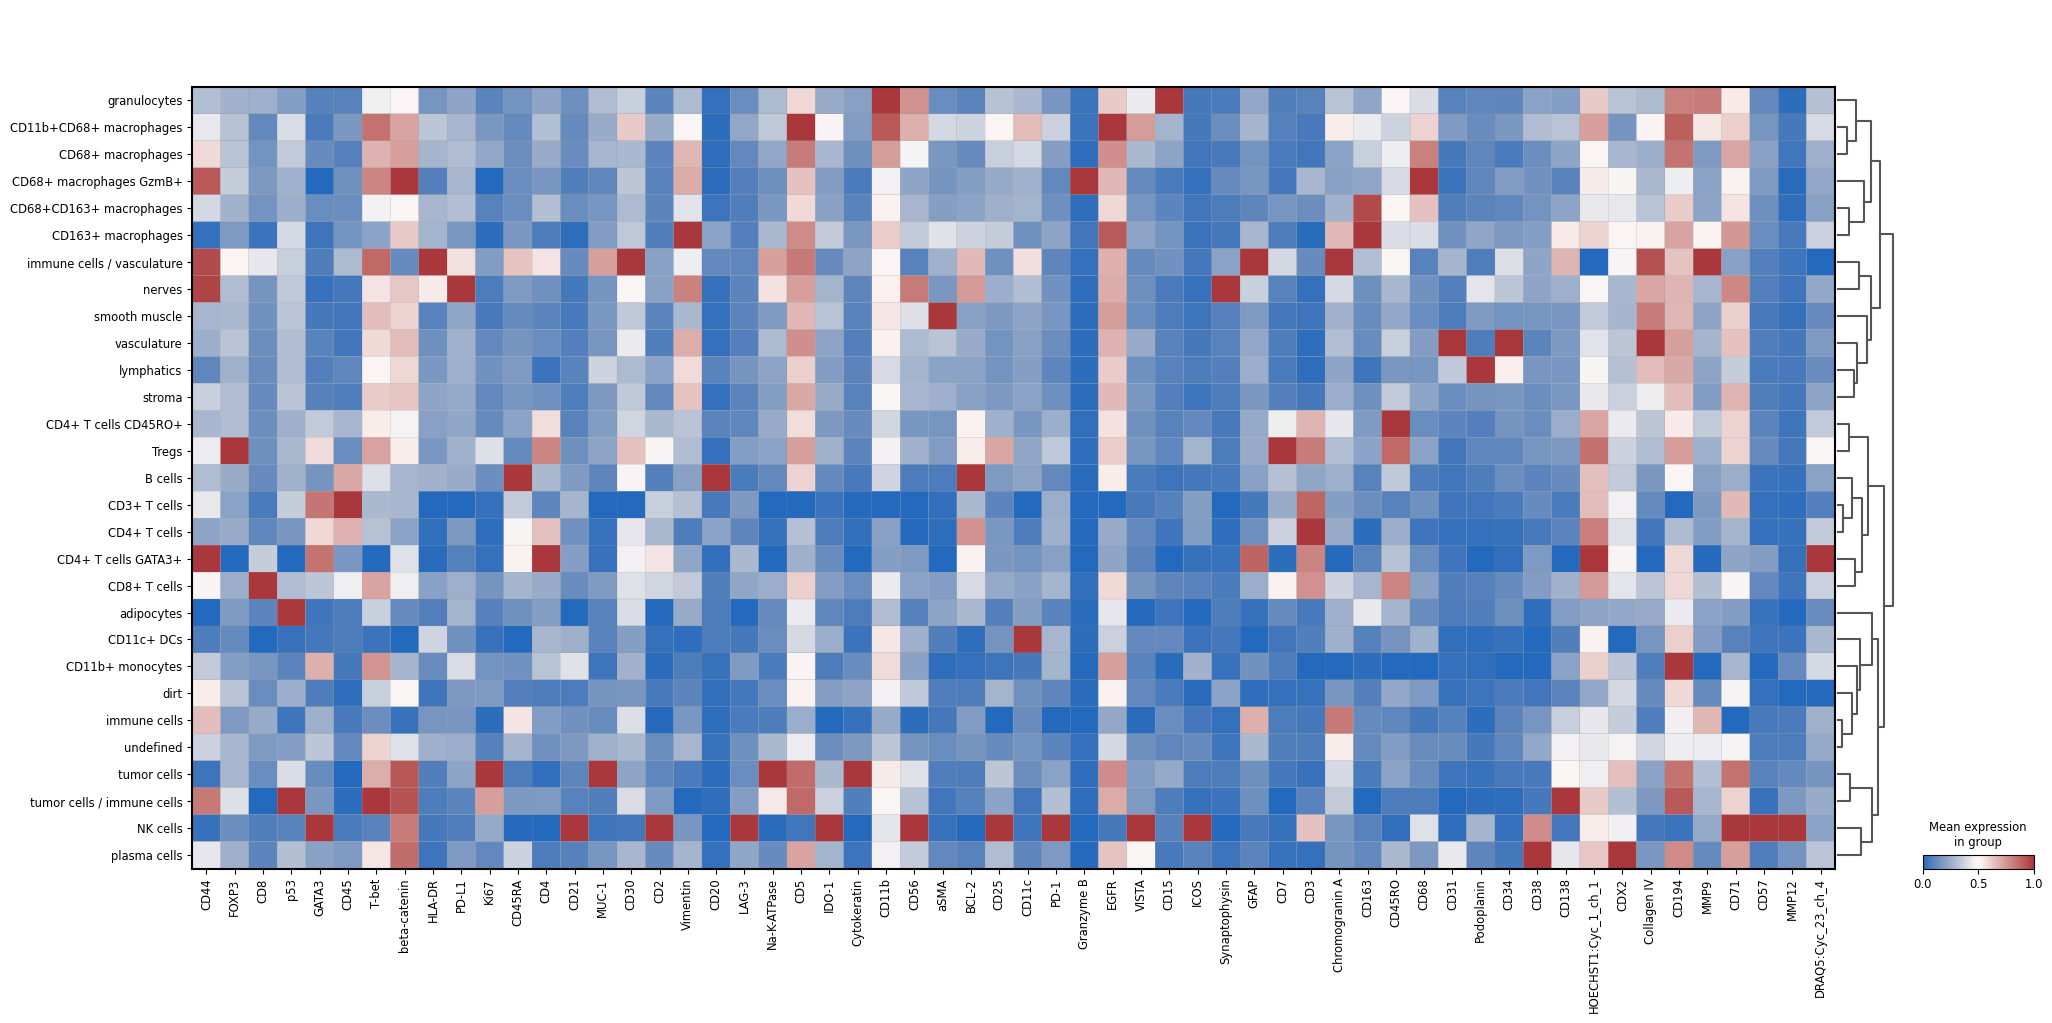

In [54]:
sc.pl.matrixplot(adata, var_names=adata.var_names, groupby='cell_type', cmap='vlag', dendrogram=True, use_raw=False, standard_scale='var')

Adipocytes with p53? Plasma cells not very positive for CD138, lower than 'tumor/immune'

In [55]:
adata.obs['cell_type'].value_counts()

cell_type
tumor cells                   47602
CD68+CD163+ macrophages       39596
smooth muscle                 27817
granulocytes                  22144
stroma                        20139
CD8+ T cells                  16675
CD4+ T cells CD45RO+          16661
B cells                       13043
vasculature                   11725
plasma cells                   8510
dirt                           7357
undefined                      6524
immune cells                   3127
Tregs                          2791
CD4+ T cells                   2303
immune cells / vasculature     2153
CD68+ macrophages              2108
adipocytes                     1811
tumor cells / immune cells     1797
CD11b+CD68+ macrophages        1500
CD11b+ monocytes                815
nerves                          659
CD11c+ DCs                      400
lymphatics                      328
NK cells                        323
CD3+ T cells                    189
CD68+ macrophages GzmB+         183
CD4+ T cells GATA3

In [56]:
sc.tl.rank_genes_groups(adata, groupby='cell_type' , method='wilcoxon')

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:458: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:459: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:458: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups

In [60]:
sc.tl.filter_rank_genes_groups(adata, min_in_group_fraction=0.4, max_out_group_fraction = 1, key = 'rank_genes_groups', key_added='rank_genes_groups_filtered')

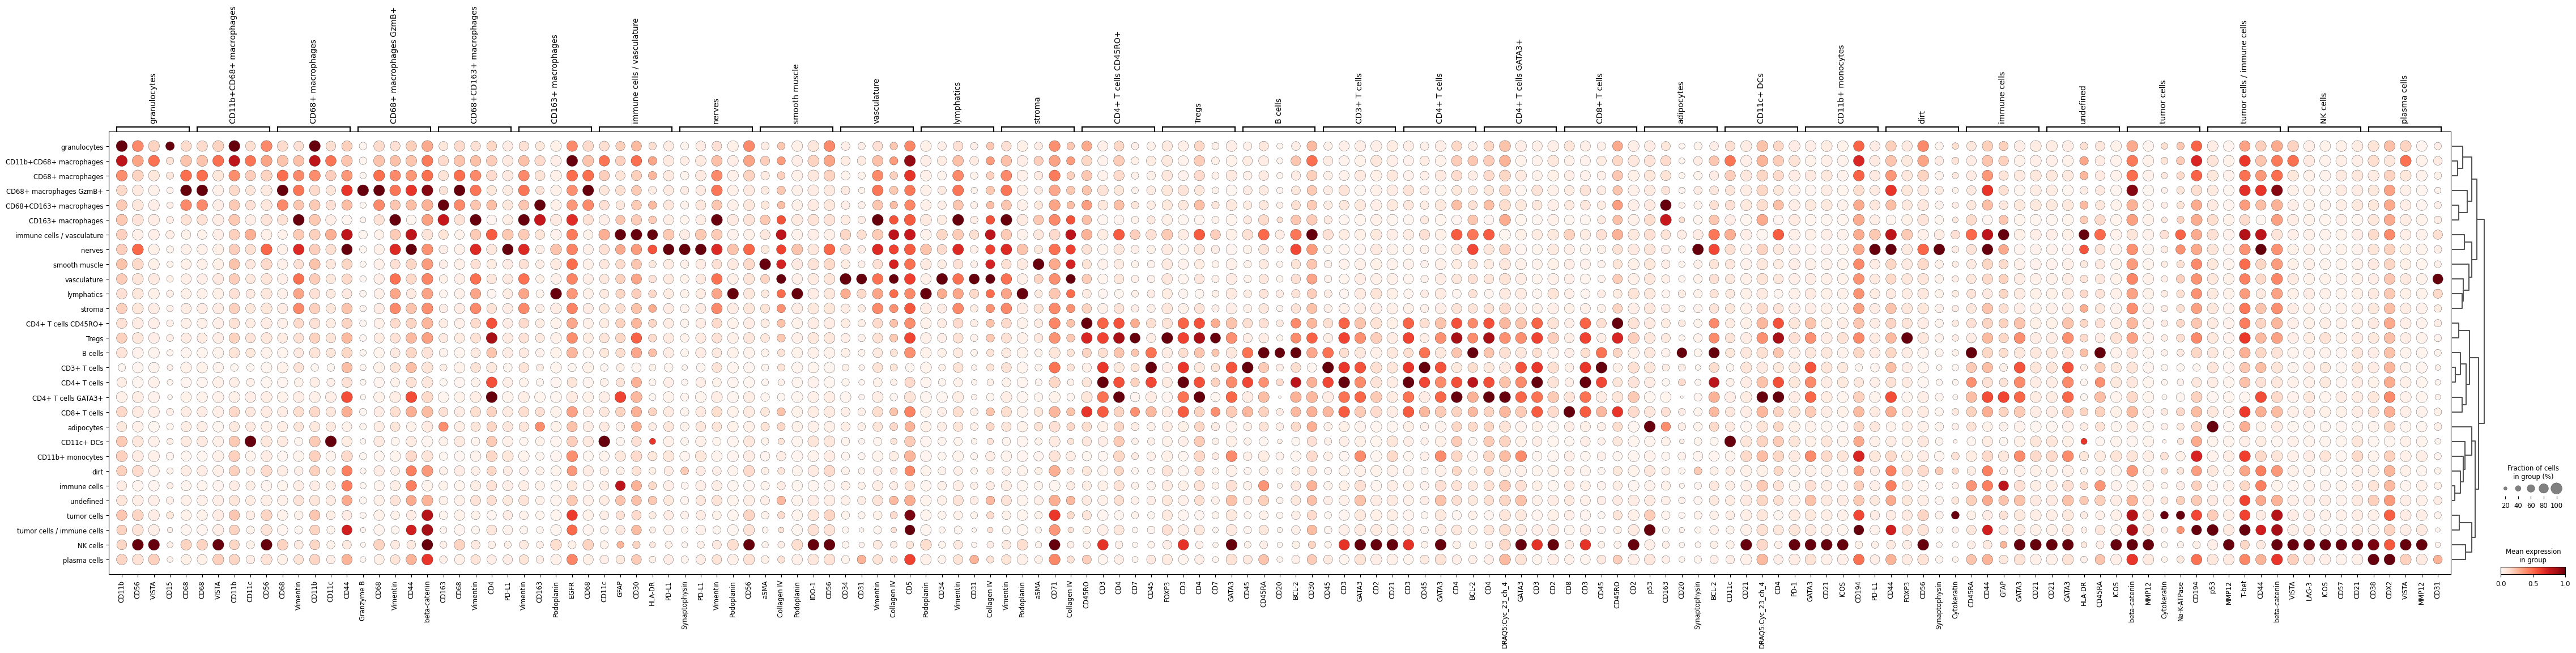

In [58]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, standard_scale='var', key='rank_genes_groups')

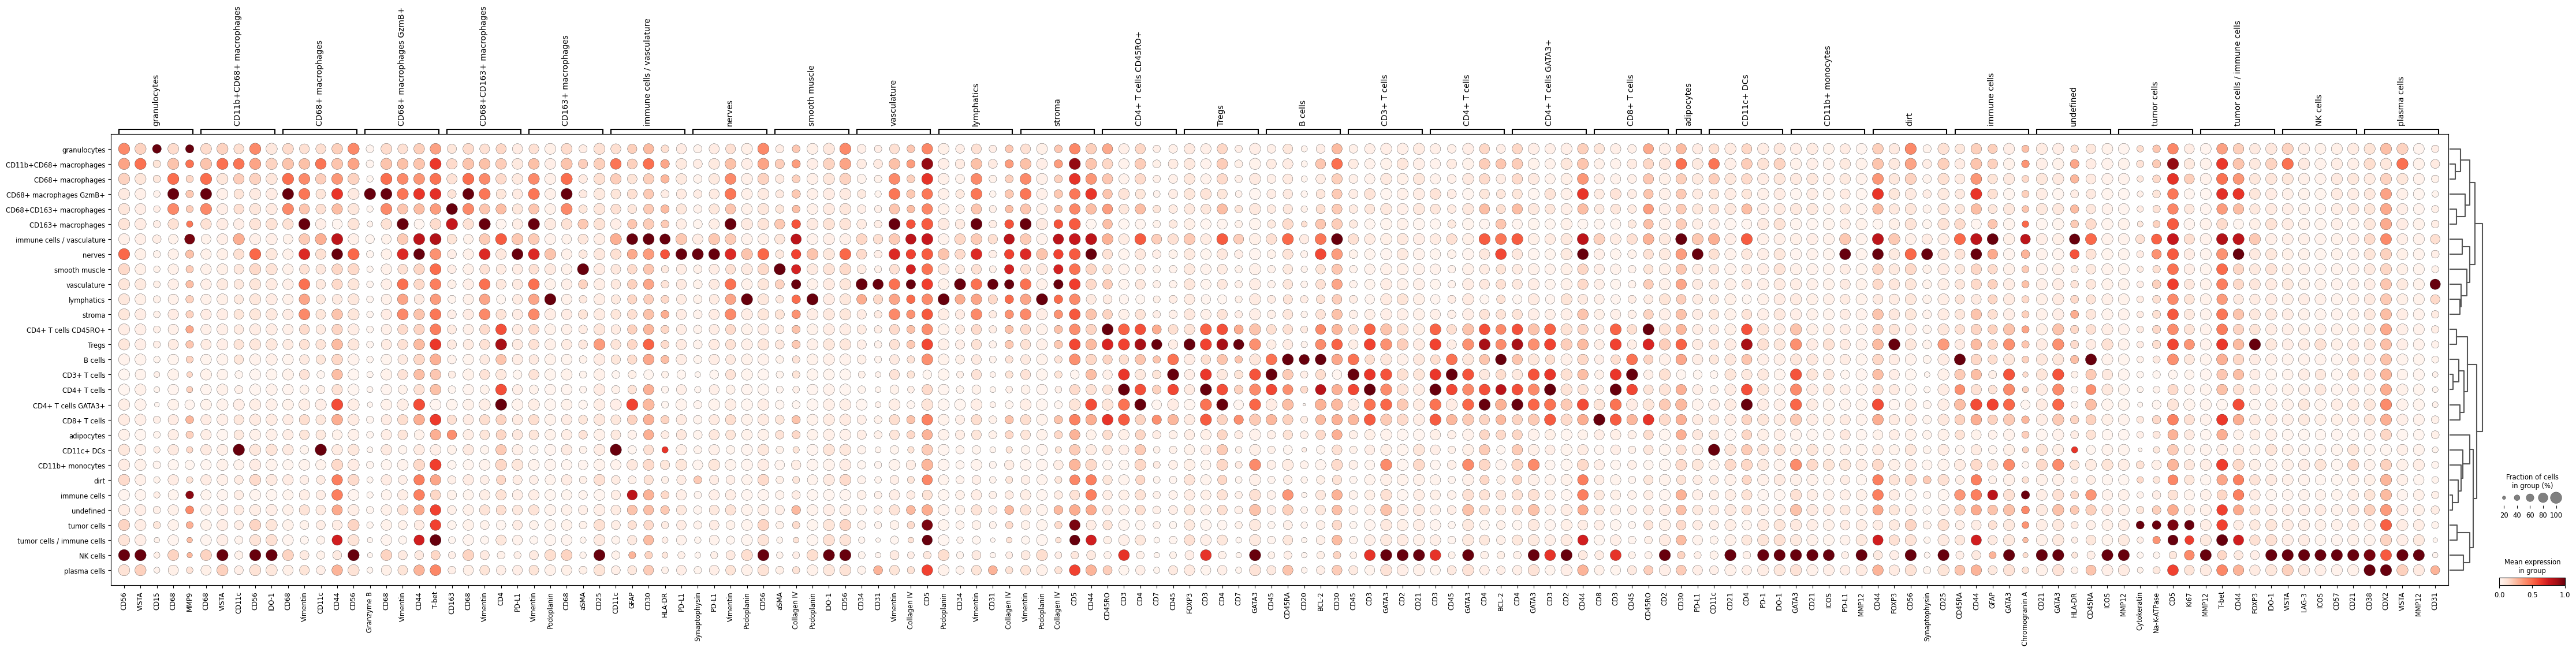

In [61]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, standard_scale='var', key='rank_genes_groups_filtered')